In [2]:
import numpy as np

# set input data
points = np.array([[0, 0, 1], [0, 0, -1], [1, 0, 0],
                   [0, 1, 0], [0, -1, 0], [-1, 0, 0]])

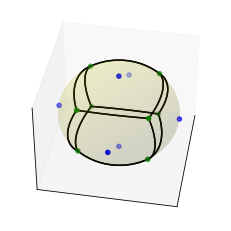

In [3]:
import numpy as np
import pandas as pd
from Utils import eulerian_to_cartesian, cartesian_to_eulerian, rotationBetweenVectors, interpolate_quaternions, degrees_to_radian, radian_to_degrees, compute_orthodromic_distance, store_dict_as_csv
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi, geometric_slerp
from mpl_toolkits.mplot3d import proj3d


radius = 1
center = np.array([0, 0, 0])
sv = SphericalVoronoi(points, radius, center)
# sort vertices (optional, helpful for plotting)
sv.sort_vertices_of_regions()
t_vals = np.linspace(0, 1, 2000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot the unit sphere for reference (optional)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='y', alpha=0.1)
# plot generator points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')
# plot Voronoi vertices
ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2],
                   c='g')
# indicate Voronoi regions (as Euclidean polygons)
for region in sv.regions:
   n = len(region)
   for i in range(n):
       start = sv.vertices[region][i]
       end = sv.vertices[region][(i + 1) % n]
       result = geometric_slerp(start, end, t_vals)
       ax.plot(result[..., 0],
               result[..., 1],
               result[..., 2],
               c='k')
ax.azim = 10
ax.elev = 40
_ = ax.set_xticks([])
_ = ax.set_yticks([])
_ = ax.set_zticks([])
fig.set_size_inches(4, 4)
plt.show()
                   